Assignments 1

● Write Python code to filter rows where City_Development_Index > 0.8 and Company_Size is greater than 3.

● Use iloc to select the first 10 rows and specific columns like Experience and Education_Level.

● Group data by Relevant_Experience and calculate the average City_Development_Index for each group.

● Group by Company_Size and count the number of unique entries in Last_New_Job.

● Analyze the frequency distribution of Company_Type using value_counts().

● Identify numerical columns with missing values and fill them using the mean

● Drop rows where more than 50% of data is missing, and document the impact on dataset size

Applied Learning Assignments 1:

● Query the dataset to extract rows where Experience > 10 and Company_Size == 7.

● Create a new feature Experience_Gap by subtracting Last_New_Job from Experience.

● Normalize City_Development_Index to a 0–1 scale and explain the benefits of normalization.

● Create new column cdi_per and merge it to the original dataframe using pd.merge and analyze the combined insights

### Importing Libraries

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [51]:
df = pd.read_csv("job_change_data.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [15]:
#Display column names and their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [17]:
#numerical values
df.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [19]:
#categorical
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,2129,1621,2129,2098,2077,1817,2124,1507,1495,2089
unique,108,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,473,1460,1524,1519,1269,1621,383,338,1141,884


In [23]:
#Numerical
df.describe(include='number')

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [29]:
df['company_size'].unique()

array(['<10', nan, 'Oct-49', '10000+', '100-500', '50-99', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

#### Write Python code to filter rows where City_Development_Index > 0.8 and Company_Size is greater than 3
- the company size is a string datatype and also has some charact including null values so we cannot be able to filter it directly with the 
city development column. Therefore, we will first remove the character, and extract the last number, then convert it to numeric.


In [41]:
df['company_size'] = df['company_size'].replace({
    '<10': '10',
    'Oct-49': '49',
    '50-99' : '99',
    '100-500' : '500',
    '500-999' : '999',
    '1000-4999' : '4999',
    '5000-9999' : '9999',
    '10000+': '10000',
    'nan' : '0'       
})

In [45]:
df['company_size'] = pd.to_numeric(df['company_size'])

In [49]:
filtered_df = df[(df['city_development_index'] > 0.8) & (df['company_size'] > 3)]
filtered_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,10,NaN,1,21
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000,Pvt Ltd,>4,72
13,24372,city_98,0.949,NaN,Has relevent experience,no_enrollment,Masters,STEM,4,500,Pvt Ltd,1,134
17,7463,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,Business Degree,2,99,Pvt Ltd,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,10726,city_71,0.884,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,500,Public Sector,1,16
2116,31643,city_75,0.939,Male,Has relevent experience,no_enrollment,High School,NaN,>20,500,Public Sector,2,58
2121,27163,city_173,0.878,Male,No relevent experience,no_enrollment,Masters,STEM,16,10,Pvt Ltd,>4,58
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,500,Public Sector,1,84


#### Use iloc to select the first 10 rows and specific columns like Experience and Education_Level.

In [57]:
selected_columns = df.iloc[:10][['experience', 'education_level']]
selected_columns

,experience,education_level
0,9,Graduate
1,5,Graduate
2,<1,High School
3,11,Masters
4,>20,Graduate
5,10,Masters
6,<1,Graduate
7,>20,Graduate
8,14,Graduate
9,3,Graduate


#### Group data by Relevant_Experience and calculate the average City_Development_Index for each group

In [64]:
grouped_avg = df.groupby('relevent_experience')['city_development_index'].mean()
grouped_avg

relevent_experience
Has relevent experience    0.831000
No relevent experience     0.809828
Name: city_development_index, dtype: float64

#### Group by Company_Size and count the number of unique entries in Last_New_Job.

In [66]:
unique_values = df.groupby('company_size')['last_new_job'].nunique()
unique_values

company_size
100-500      6
1000-4999    6
10000+       6
50-99        6
500-999      6
5000-9999    6
<10          6
Oct-49       6
Name: last_new_job, dtype: int64

#### Analyze the frequency distribution of Company_Type using value_counts().

In [87]:
df['company_type'].value_counts(dropna=False)

company_type
Pvt Ltd                1141
NaN                     634
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: count, dtype: int64

#### Identify numerical columns with missing values and fill them using the mean

In [108]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include='number')
numerical_cols

,enrollee_id,city_development_index,training_hours
0,32403,0.827,21
1,9858,0.920,98
2,31806,0.624,15
3,27385,0.827,39
4,27724,0.920,72
...,...,...,...
2124,1289,0.920,15
2125,195,0.897,30
2126,31762,0.887,18
2127,7873,0.804,84


In [106]:
# Identify columns with missing values
missing_numerical = df.describe(include='number').isnull().any()
missing_numerical

enrollee_id               False
city_development_index    False
training_hours            False
dtype: bool

###### Since there is no missing values in the columns, we're not going to fill anything. 
###### df['enrollee_id', 'city_development_index', 'training_hours'] = df['enrollee_id', 'city_development_index', 'training_hours'].fillna(df[['enrollee_id', 'city_development_index', 'training_hours']].mean())


#### Drop rows where more than 50% of data is missing, and document the impact on dataset size

In [120]:
new_df = df.dropna(thresh=df.shape[1] * 0.5)
new_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


The shape of the dataset was 2129 row and 13 columns initially, but after dropping rows with more than 50% missing values, we now have 2127 row and 13 columns, meaning there are 2 rows with more than 50% missing values

#### Query the dataset to extract rows where Experience > 10 and Company_Size == 7

In [133]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [135]:
df['experience'].unique()

array(['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [149]:
df['experience'] = df['experience'].replace({
    '<1': '1',
    '>20' :'20',
    'nan' : '0'       
})

In [151]:
df['company_size'].unique()

array(['10', nan, '49', '10000', '500', '99', '4999', '999', '9999'],
      dtype=object)

In [153]:
df['company_size'] = df['company_size'].replace({
    '<10': '10',
    'Oct-49': '49',
    '50-99' : '99',
    '100-500' : '500',
    '500-999' : '999',
    '1000-4999' : '4999',
    '5000-9999' : '9999',
    '10000+': '10000',
    'nan' : '0'       
})

In [163]:
# Conveting 'experience' and 'company size' to numeric 
df['experience'] = pd.to_numeric(df['experience'])
df['company_size'] = pd.to_numeric(df['company_size'])


filtered_df = df[(df['experience'] > 10) & (df['company_size'] == 7)]
filtered_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours


This shows that is there is not row where 'Experience' is >10 and 'Company Size' is exactly 7. The issue could come from the cleaning because I converted the rows that are <10 to exactly 10.

#### Create a new feature Experience_Gap by subtracting Last_New_Job from Experience

In [168]:
df['experience'].unique()

array([ 9.,  5.,  1., 11., 20., 10., 14.,  3.,  8.,  4., 13.,  2.,  6.,
        7., 19., 15., 16., nan, 17., 18., 12.])

In [180]:
df['last_new_job'].unique()

array([ 1., nan,  2.,  4.,  3.])

In [188]:
df['last_new_job'] = df['last_new_job'].replace({
    np.nan : '0'
})

In [194]:
# Converting 'last_new_job' to numeric 
df['last_new_job'] = pd.to_numeric(df['last_new_job'])

# Creating the new column
df['Experience_Gap'] = df['experience'] - df['last_new_job']

#Showing the column
df[['experience', 'last_new_job', 'Experience_Gap']].head()


,experience,last_new_job,Experience_Gap
0,9.0,1.0,8.0
1,5.0,1.0,4.0
2,1.0,0.0,1.0
3,11.0,1.0,10.0
4,20.0,0.0,20.0


#### Normalize City_Development_Index to a 0–1 scale and explain the benefits of normalization.

In [200]:
df['city_development_index'].unique()

array([0.827, 0.92 , 0.624, 0.899, 0.878, 0.698, 0.762, 0.949, 0.722,
       0.926, 0.754, 0.743, 0.91 , 0.903, 0.913, 0.897, 0.89 , 0.924,
       0.939, 0.689, 0.794, 0.923, 0.925, 0.666, 0.807, 0.682, 0.55 ,
       0.74 , 0.887, 0.855, 0.745, 0.558, 0.487, 0.848, 0.884, 0.915,
       0.856, 0.725, 0.579, 0.764, 0.556, 0.921, 0.866, 0.767, 0.893,
       0.518, 0.527, 0.898, 0.804, 0.802, 0.895, 0.776, 0.738, 0.512,
       0.896, 0.789, 0.83 , 0.843, 0.847, 0.795, 0.664, 0.766, 0.836,
       0.727, 0.448, 0.691, 0.493, 0.479, 0.693, 0.763, 0.516, 0.742,
       0.865, 0.781, 0.788, 0.796, 0.64 , 0.563, 0.84 , 0.769, 0.555])

In [204]:
# Min-Max Normalization
df['city_development_index_normalised'] = (
    (df['city_development_index'] - df['city_development_index'].min()) /
    (df['city_development_index'].max() - df['city_development_index'].min())
)

# Showing the result
df[['city_development_index', 'city_development_index_normalised']].head()


,city_development_index,city_development_index_normalised
0,0.827,0.756487
1,0.920,0.942116
2,0.624,0.351297
3,0.827,0.756487
4,0.920,0.942116


Normalization makes all data values fit between 0 and 1 helps machine learning learn better. Big numbers in the data won't unfairly influence the learning process. This makes the learning faster, more stable, and the final result works better because the model considers all the information fairly.

#### Create new column cdi_per and merge it to the original dataframe using pd.merge and analyze the combined insights

In [216]:
# Create a new DataFrame with index and percentile rank
cdi_percentile_df = df[['city_development_index']].copy()
cdi_percentile_df['cdi_per'] = cdi_percentile_df['city_development_index'].rank(pct=True)
cdi_percentile_df.reset_index(inplace=True)
cdi_percentile_df

,index,city_development_index,cdi_per
0,0,0.827,0.358384
1,1,0.920,0.737670
2,2,0.624,0.113903
3,3,0.827,0.358384
4,4,0.920,0.737670
...,...,...,...
2124,2124,0.920,0.737670
2125,2125,0.897,0.477924
2126,2126,0.887,0.433067
2127,2127,0.804,0.346407


In [218]:
# Merge on the index since we didn't group by a specific column
df.reset_index(inplace=True)
df = pd.merge(df, cdi_percentile_df[['index', 'cdi_per']], on='index')
df.set_index('index', inplace=True)

df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Experience_Gap,city_development_index_normalised,cdi_per_x,cdi_per_y,cdi_per
index,,,,,,,,,,,,,,,,,,
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,10.0,NaN,1.0,21,8.0,0.756487,0.358384,0.358384,0.358384
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,NaN,Pvt Ltd,1.0,98,4.0,0.942116,0.737670,0.737670,0.737670
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,1.0,NaN,Pvt Ltd,0.0,15,1.0,0.351297,0.113903,0.113903,0.113903
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,49.0,Pvt Ltd,1.0,39,10.0,0.756487,0.358384,0.358384,0.358384
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,10000.0,Pvt Ltd,0.0,72,20.0,0.942116,0.737670,0.737670,0.737670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16.0,NaN,Public Sector,4.0,15,12.0,0.942116,0.737670,0.737670,0.737670
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18.0,NaN,NaN,2.0,30,16.0,0.896208,0.477924,0.477924,0.477924
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3.0,NaN,Pvt Ltd,0.0,18,3.0,0.876248,0.433067,0.433067,0.433067


In [220]:
# Group by experience and checking average cdi_per
df.groupby('experience')['cdi_per'].mean()

#Checking the correlation bewteen cdi_per and experience
df[['cdi_per', 'experience']].corr()


,cdi_per,experience
cdi_per,1.000000,0.363984
experience,0.363984,1.000000


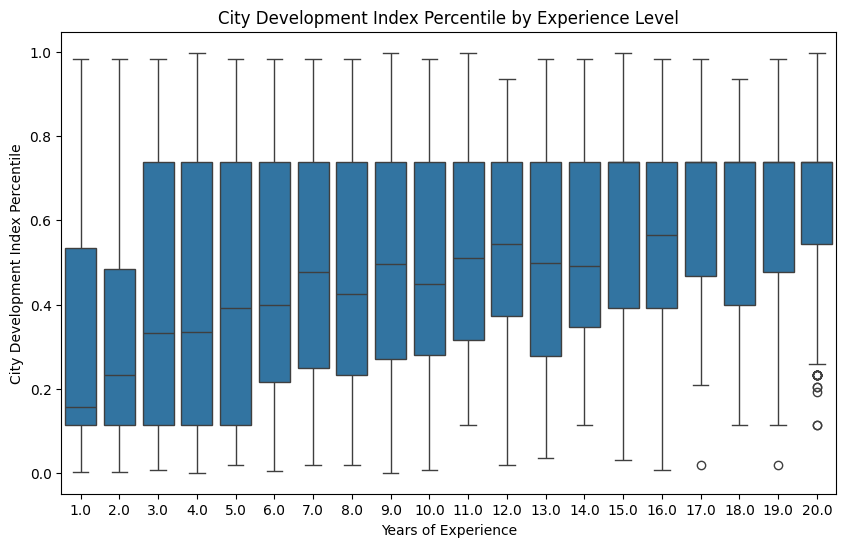

In [232]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='experience', y='cdi_per', data=df)

# Setting axis titles
plt.xlabel("Years of Experience")
plt.ylabel("City Development Index Percentile")
plt.title("City Development Index Percentile by Experience Level")
plt.show()

This box plot shows the distribution of City Development Index Percentile for different years of experience (from 1 to 20). Each box represents the middle 50% of the data for that experience level, the line inside shows the median, and the whiskers show the spread.

Generally, as years of experience increase, the median City Development Index Percentile tends to rise. However, there's significant variability within each experience group, especially at lower experience levels. 